<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/GRU_Model_TensorFlow_Dengan_DeteksiSarkasme_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌GRU Model TensorFlow Dengan DeteksiSarkasme.json**

# Install Library

In [3]:
!pip install torch torchvision torchaudio
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.7 MB/s eta 0:00:00


# Import Library

In [9]:
import keras_tuner as kt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import json
import pandas as pd


# Load Dataset

In [10]:
import json # Import the json module

# Membaca dataset JSON Lines
data = []
with open('/content/DeteksiSarkasme.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)
#df = df[['headline', 'is_sarcastic']]

display(df)


,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [11]:
# Extracting the text and labels
texts = [item['headline'] for item in data]
labels = [item['is_sarcastic'] for item in data]


In [12]:
# Tokenizing the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, padding='post')


In [13]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


# Bangun Model

In [14]:
# Define the model-building function
def build_model(hp):
    model = Sequential()

    # Hyperparameter tuning for embedding dimension
    model.add(Embedding(input_dim=5000,
                        output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32),
                        input_length=X.shape[1]))

    # Hyperparameter tuning for GRU units
    model.add(GRU(hp.Int('gru_units', min_value=32, max_value=128, step=32)))

    # Dropout layer to prevent overfitting
    model.add(Dropout(0.5))

    # Dense layer
    model.add(Dense(32, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [15]:
# Initialize Keras Tuner with Hyperband as the search algorithm
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',  # Aim to maximize validation accuracy
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='sarcasm_detection')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
import numpy as np

# Ensure that X_train and y_train are NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


# Hyperparameter Tuning with Keras Tuner

In [17]:
# Start the hyperparameter search
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Trial 22 Complete [00h 01m 26s]
val_accuracy: 0.858854353427887

Best val_accuracy So Far: 0.858854353427887
Total elapsed time: 00h 33m 08s


In [18]:
# Retrieve the best model after the search
best_model = tuner.get_best_models(num_models=1)[0]


# Latih Model

In [19]:
# Train the best model
history = best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9314 - loss: 0.1873 - val_accuracy: 0.8512 - val_loss: 0.3754
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9479 - loss: 0.1404 - val_accuracy: 0.8521 - val_loss: 0.4152
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9643 - loss: 0.1026 - val_accuracy: 0.8420 - val_loss: 0.5745
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9731 - loss: 0.0742 - val_accuracy: 0.8358 - val_loss: 0.6860
Epoch 5/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9818 - loss: 0.0519 - val_accuracy: 0.8418 - val_loss: 0.7100
Epoch 6/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9886 - loss: 0.0321 - val_accuracy: 0.8326 - val_loss: 0.8191
Epoch 7/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9918 - loss: 0.0253 - val_accuracy: 0.8428 - val_loss: 0.9129
Epoch 8/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.9936 - loss: 0.0198 - 

# Visualisasi

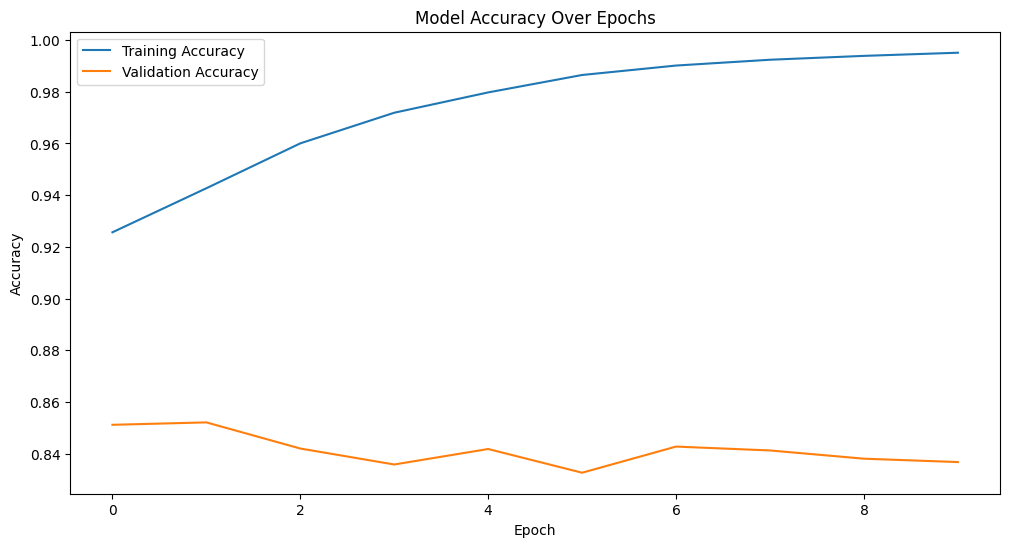

In [21]:
import matplotlib.pyplot as plt

# Visualisasi akurasi pelatihan dan validasi
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()



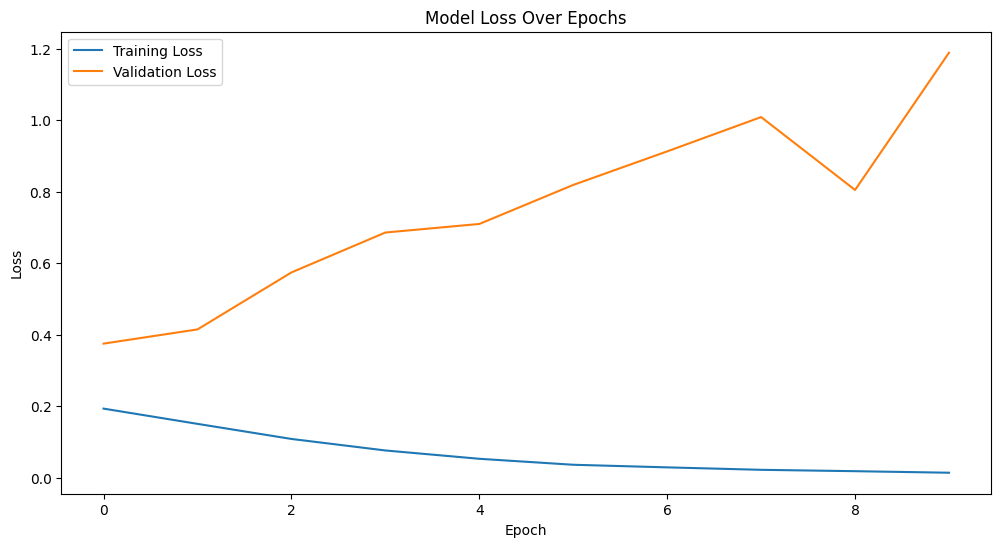

In [22]:
# Visualisasi loss pelatihan dan validasi
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()


# Matrik Evaluasi

167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
=====Matriks Evaluasi=====
Accuracy: 0.8368
Precision: 0.8367
Recall: 0.8368
F1 Score: 0.8367
AUC-ROC: 0.9074


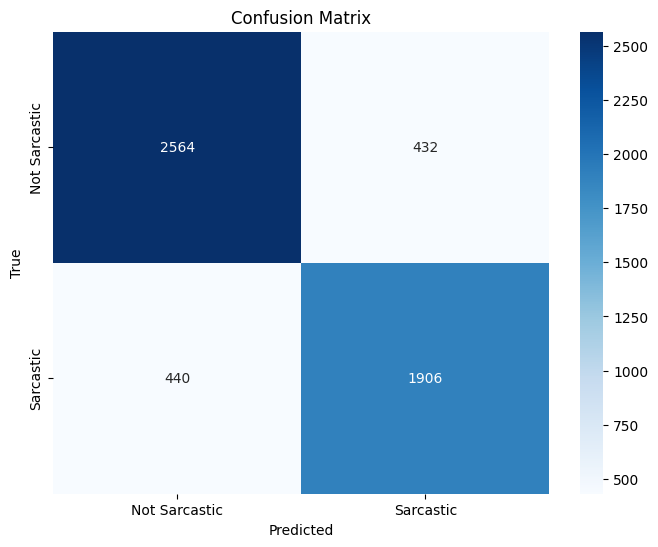

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import numpy as np

# Predict values using the best model
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract accuracy, precision, recall, and F1-score
accuracy = report['accuracy']
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

# Calculate AUC-ROC
y_pred_prob = best_model.predict(X_test)  # Get probability scores
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the metrics in the desired format
print("=====Matriks Evaluasi=====")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Confusion matrix (optional, you can keep it if you still want to visualize it)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()